# How to Train YOLOv9 on a Custom Dataset
---

[![Roboflow](https://raw.githubusercontent.com/roboflow-ai/notebooks/main/assets/badges/roboflow-blogpost.svg)](https://blog.roboflow.com/train-yolov9-model/)
[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/WongKinYiu/yolov9)
[![YouTube](https://badges.aleen42.com/src/youtube.svg)](https://youtu.be/XHT2c8jT3Bc)
[![arXiv](https://img.shields.io/badge/arXiv-2402.13616-b31b1b.svg)](https://arxiv.org/pdf/2402.13616.pdf)

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
!nvidia-smi

Mon Feb 17 01:15:46 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 565.90                 Driver Version: 565.90         CUDA Version: 12.7     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3050 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   63C    P8              6W /   30W |     485MiB /   4096MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [1]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


In [2]:
import torch
print(torch.version.cuda)     
print("PyTorch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())
print("CUDA device count:", torch.cuda.device_count())
print("CUDA device name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU found")


11.8
PyTorch version: 2.6.0+cu118
CUDA available: True
CUDA device count: 1
CUDA device name: NVIDIA GeForce RTX 3050 Laptop GPU


**NOTE:** To make it easier for us to manage datasets, images and models we create a `HOME` constant.

In [3]:
import os
HOME = os.getcwd()
print(HOME)

C:\Users\Admin\Desktop\yolov9


## Clone and Install

**NOTE:** YOLOv9 is very new. At the moment, we recommend using a fork of the main repository. The `detect.py` script contains a bug that prevents inference. This bug is patched in the fork.

In [6]:
!pip uninstall packaging
!pip install packaging==23.0  # 安装兼容的版本


^C


ERROR: Invalid requirement: '#'


In [3]:
!git clone https://github.com/SkalskiP/yolov9.git
%cd yolov9
!pip install -r requirements.txt -q

C:\Users\Admin\Desktop\yolov9\yolov9


Cloning into 'yolov9'...
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit 1.32.0 requires packaging<24,>=16.8, but you have packaging 24.1 which is incompatible.


**NOTE:** Let's install the [`roboflow`](https://pypi.org/project/roboflow) package, which we will use to download our dataset from [Roboflow Universe](https://universe.roboflow.com/).

In [8]:
!pip install -q roboflow

## Download model weights

**NOTE:** In the YOLOv9 paper, versions `yolov9-s` and `yolov9-m` are also mentioned, but the weights for these models are not yet available in the YOLOv9 [repository](https://github.com/WongKinYiu/yolov9).

In [16]:
#!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
!curl -O https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt
#!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt
#!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-e.pt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0


In [25]:
!dir "C:/Users/Admin/Desktop/yolov9/yolov9/weights"

 磁碟區 C 中的磁碟是 Windows
 磁碟區序號:  D004-7C97

 C:\Users\Admin\Desktop\yolov9\yolov9\weights 的目錄

2025/02/05  上午 01:33    <DIR>          .
2025/02/05  上午 01:33    <DIR>          ..
2025/02/05  上午 01:33                 0 yolov9-e.pt
               1 個檔案               0 位元組
               2 個目錄  109,687,754,752 位元組可用


## Download example data

**NOTE:** If you want to run inference using your own file as input, simply upload image to Google Colab and update `SOURCE_IMAGE_PATH` with the path leading to your file.

In [31]:
!curl -O https://media.roboflow.com/notebooks/examples/dog.jpeg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  103k  100  103k    0     0   163k      0 --:--:-- --:--:-- --:--:--  164k


In [37]:
SOURCE_IMAGE_PATH = r"C:\Users\Admin\Desktop\yolov9\yolov9\data\dog.jpeg"

## Detection with pre-trained COCO model

### gelan-c

In [ ]:
!python detect.py --weights {HOME}/weights/gelan-c.pt --conf 0.1 --source {HOME}/data/dog.jpeg --device 0

detect: weights=['/content/weights/gelan-c.pt'], source=/content/data/dog.jpeg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 467 layers, 25472640 parameters, 0 gradients, 102.8 GFLOPs
image 1/1 /content/data/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 1 handbag, 235.8ms
Speed: 0.6ms pre-process, 235.8ms inference, 704.3ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp


**NOTE:** By default, the results of each subsequent inference sessions are saved in `{HOME}/yolov9/runs/detect/`, in directories named `exp`, `exp2`, `exp3`, ... You can override this behavior by using the `--name` parameter.

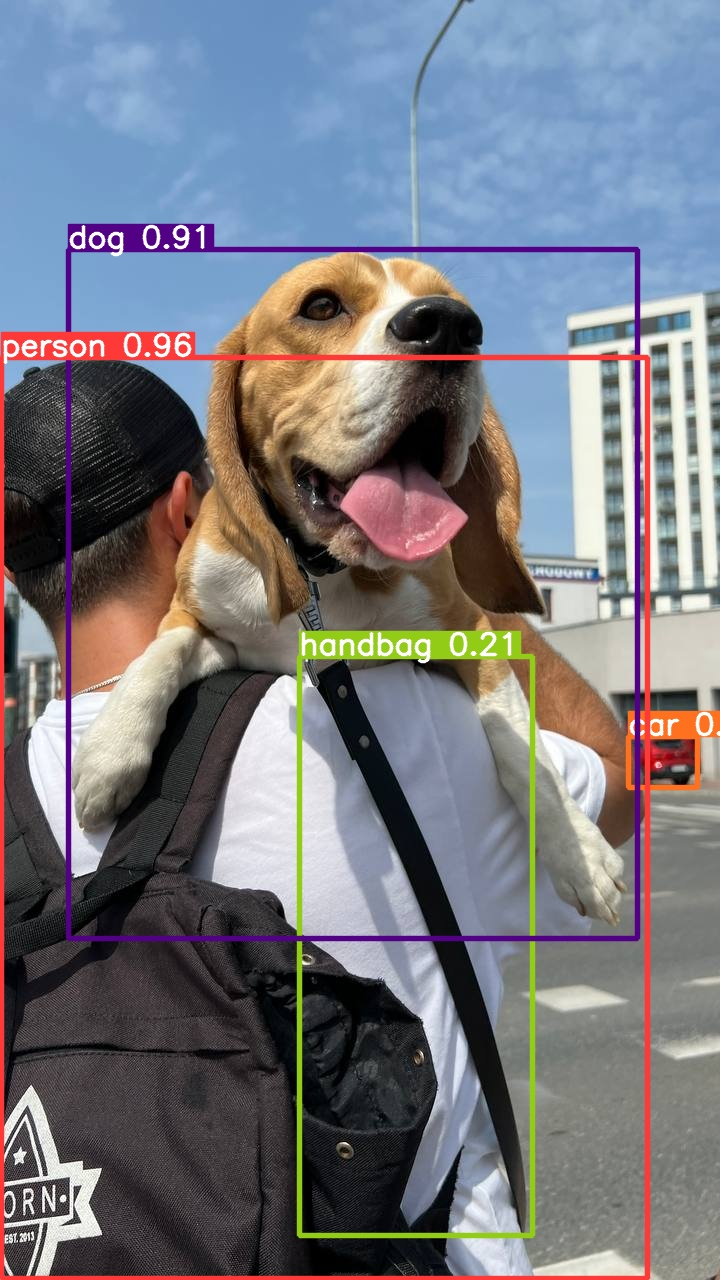

In [ ]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/detect/exp/dog.jpeg", width=600)

## yolov9-e

In [45]:
!python detect.py --weights "C:\Users\Admin\Desktop\yolov9\yolov9\weights\yolov9-e.pt" --conf 0.1 --source "C:\Users\Admin\Desktop\yolov9\yolov9\data\dog.jpeg" --device 0

detect: weights=['C:\\Users\\Admin\\Desktop\\yolov9\\yolov9\\weights\\yolov9-e.pt'], source=C:\Users\Admin\Desktop\yolov9\yolov9\data\dog.jpeg, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5  1e33dbb Python-3.12.4 torch-2.6.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)

Fusing layers... 
Model summary: 1119 layers, 69470144 parameters, 0 gradients, 244.0 GFLOPs
image 1/1 C:\Users\Admin\Desktop\yolov9\yolov9\data\dog.jpeg: 640x384 1 person, 1 car, 1 dog, 1 backpack, 1 handbag, 250.2ms
Speed: 16.0ms pre-process, 250.2ms inference, 913.5ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs\detect\exp8


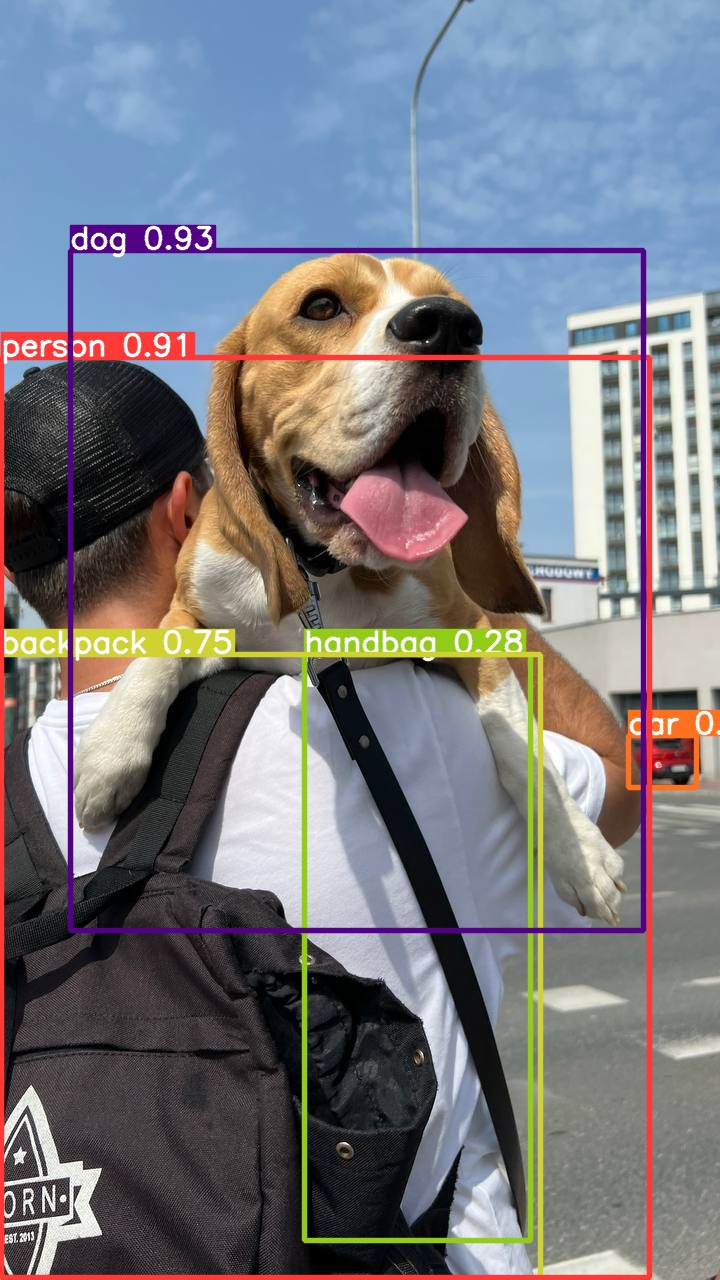

In [47]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/detect/exp8/dog.jpeg", width=600)

## Authenticate and Download the Dataset

**NOTE:** The dataset must be saved inside the `{HOME}/yolov9` directory, otherwise, the training will not succeed.

In [5]:
%cd {HOME}/yolov9

C:\Users\Admin\Desktop\yolov9\yolov9


**NOTE:** In this tutorial, I will use the [football-players-detection](https://universe.roboflow.com/roboflow-jvuqo/football-players-detection-3zvbc) dataset. Feel free to replace it with your dataset in YOLO format or use another dataset available on [Roboflow Universe](https://universe.roboflow.com). Additionally, if you plan to deploy your model to Roboflow after training, make sure you are the owner of the dataset and that no model is associated with the version of the dataset you are going to training on.

In [49]:
from roboflow import Roboflow

rf = Roboflow(api_key="PCeFPKZg3iJmdXiPD5kK")
project = rf.workspace("yolov9-97g9f").project("yolov9-lqvyi")
version = project.version(2)
dataset = version.download("yolov9")
                

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to yolov9-2 in yolov9:: 100%|██████████| 72/72 [00:00<00:00, 845.05it/s]


## Train Custom Model

In [59]:
pip install tbb


   ---------------------------------------- 0.0/298.7 kB ? eta -:--:--
   - -------------------------------------- 10.2/298.7 kB ? eta -:--:--
   -- ------------------------------------ 20.5/298.7 kB 330.3 kB/s eta 0:00:01
   ----- --------------------------------- 41.0/298.7 kB 330.3 kB/s eta 0:00:01
   --------- ----------------------------- 71.7/298.7 kB 438.9 kB/s eta 0:00:01
   ---------------------- --------------- 174.1/298.7 kB 876.1 kB/s eta 0:00:01
   -------------------------------------- - 286.7/298.7 kB 1.2 MB/s eta 0:00:01
   ---------------------------------------- 298.7/298.7 kB 1.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/338.4 kB ? eta -:--:--
   ------------------------------------- -- 317.4/338.4 kB 9.9 MB/s eta 0:00:01
   ---------------------------------------- 338.4/338.4 kB 7.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [20]:
%cd {HOME}/yolov9

!python train.py --workers 0\
--batch 4 --epochs 50 --img 1280 --device 0 --min-items 1 --close-mosaic 10 \
--data C:/Users/Admin/Desktop/yolov9/yolov9/data/data.yaml \
--weights {HOME}/yolov9/weights/gelan-e.pt \
--cfg models/detect/gelan-c.yaml \
--hyp hyp.scratch-high.yaml

C:\Users\Admin\Desktop\yolov9\yolov9
Checkpoint loaded successfully.


train: weights=C:\Users\Admin\Desktop\yolov9/yolov9/weights/gelan-e.pt, cfg=models/detect/gelan-c.yaml, data=C:/Users/Admin/Desktop/yolov9/yolov9/data/data.yaml, hyp=hyp.scratch-high.yaml, epochs=50, batch_size=4, imgsz=1280, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=0, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=0, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, flat_cos_lr=False, fixed_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, min_items=1, close_mosaic=10, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
YOLOv5  1e33dbb Python-3.12.4 torch-2.6.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=7.5, 

## Examine Training Results

**NOTE:** By default, the results of each subsequent training sessions are saved in `{HOME}/yolov9/runs/train/`, in directories named `exp`, `exp2`, `exp3`, ... You can override this behavior by using the `--name` parameter.

In [ ]:
!ls {HOME}/yolov9/runs/train/exp/

confusion_matrix.png				    P_curve.png       train_batch2.jpg
events.out.tfevents.1709205293.f80636ca2632.2700.0  PR_curve.png      val_batch0_labels.jpg
F1_curve.png					    R_curve.png       val_batch0_pred.jpg
hyp.yaml					    results.csv       val_batch1_labels.jpg
labels_correlogram.jpg				    results.png       val_batch1_pred.jpg
labels.jpg					    train_batch0.jpg  weights
opt.yaml					    train_batch1.jpg


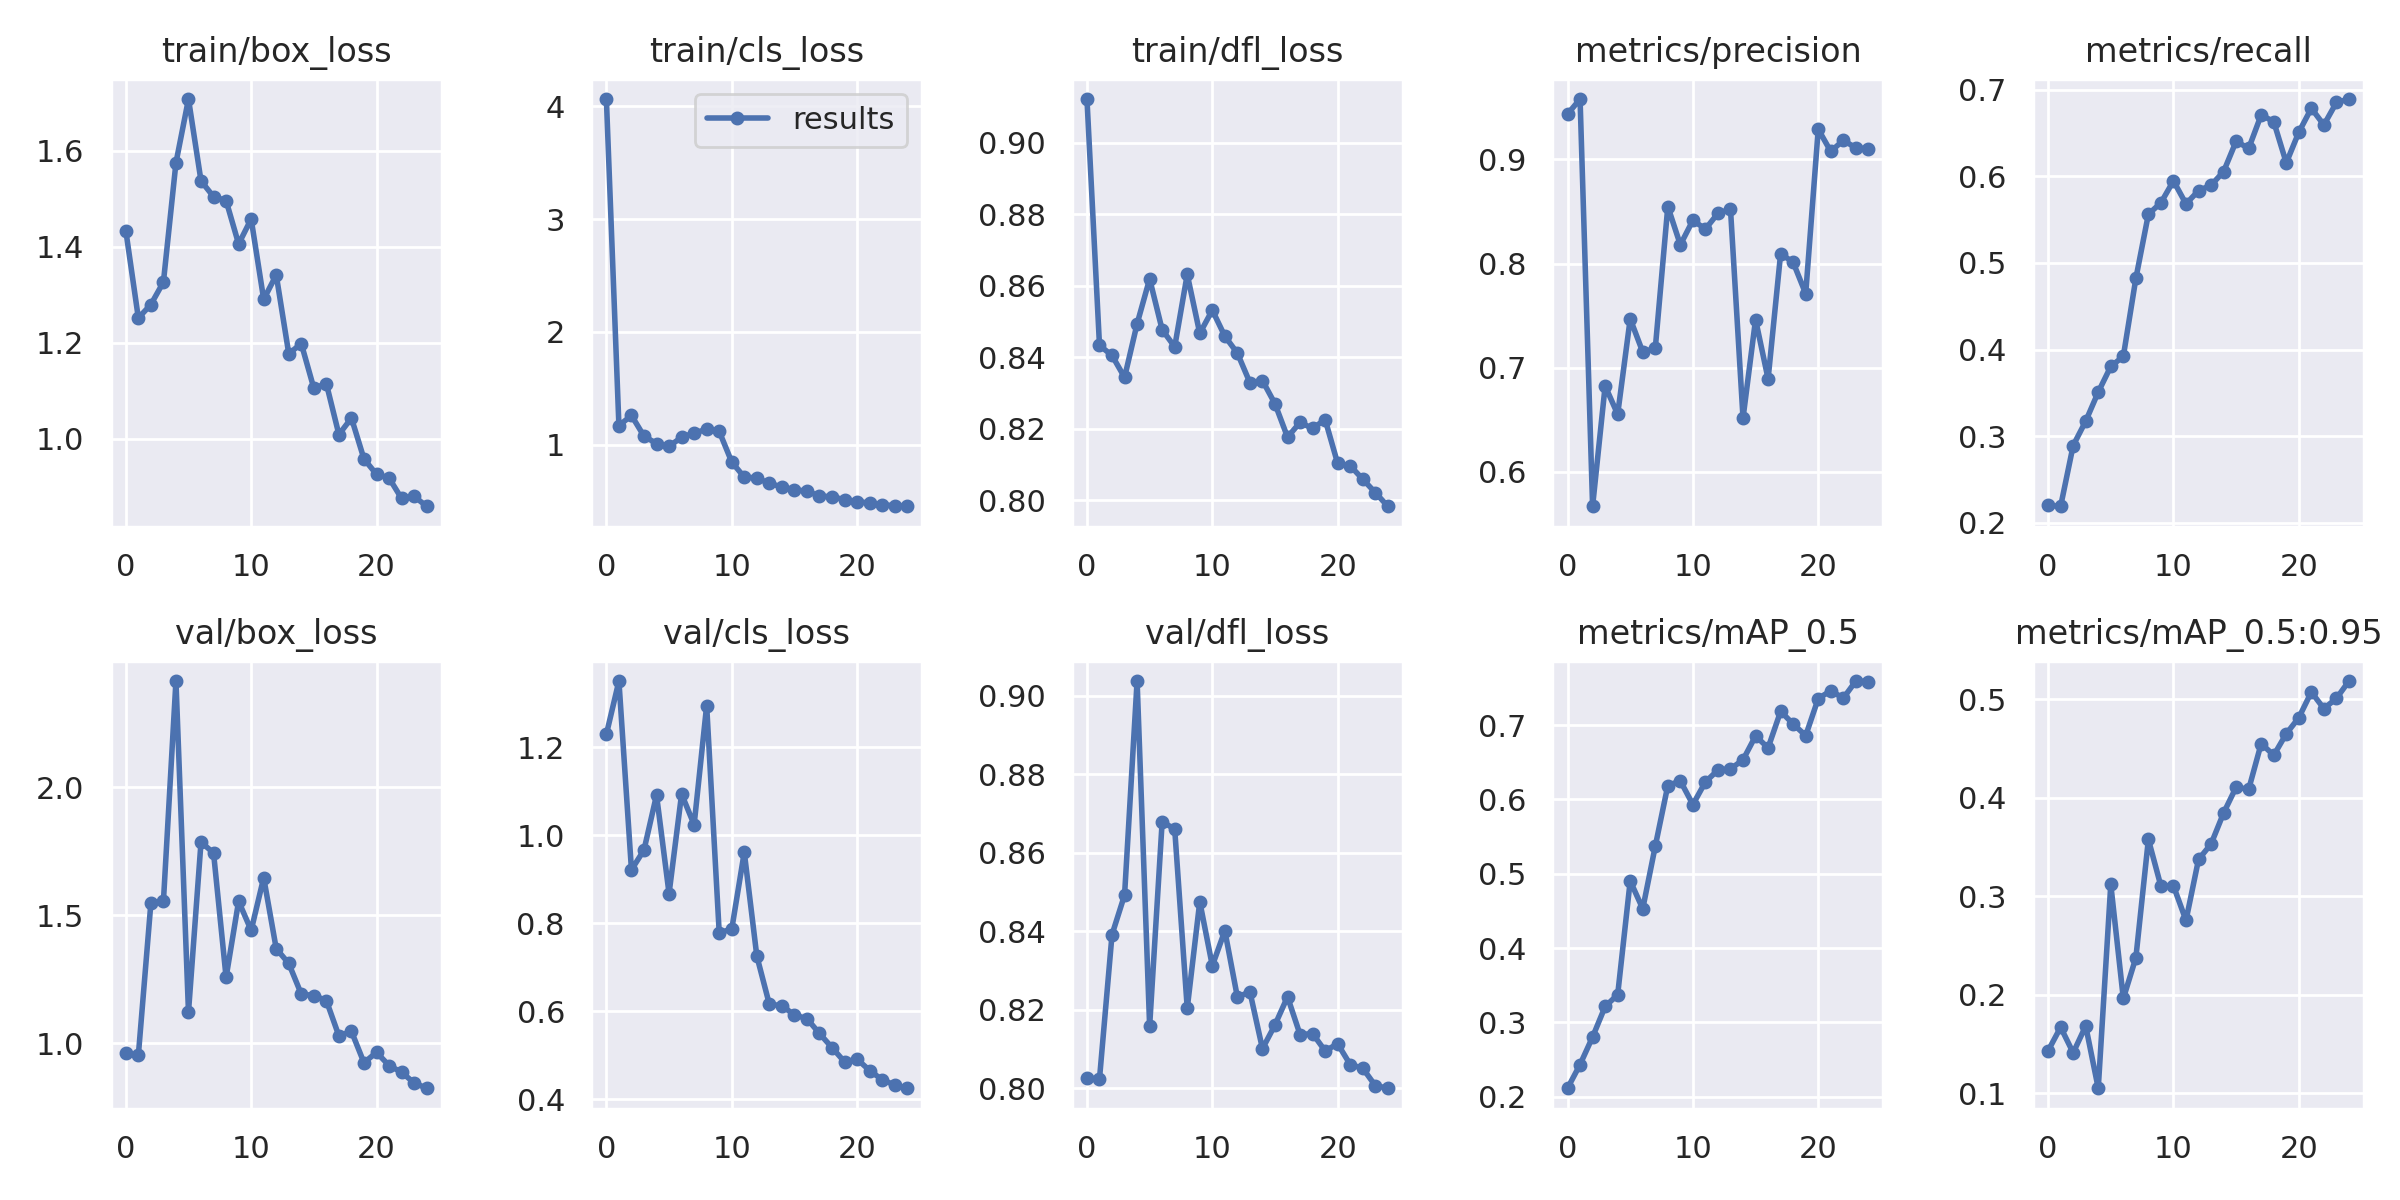

In [ ]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp/results.png", width=1000)

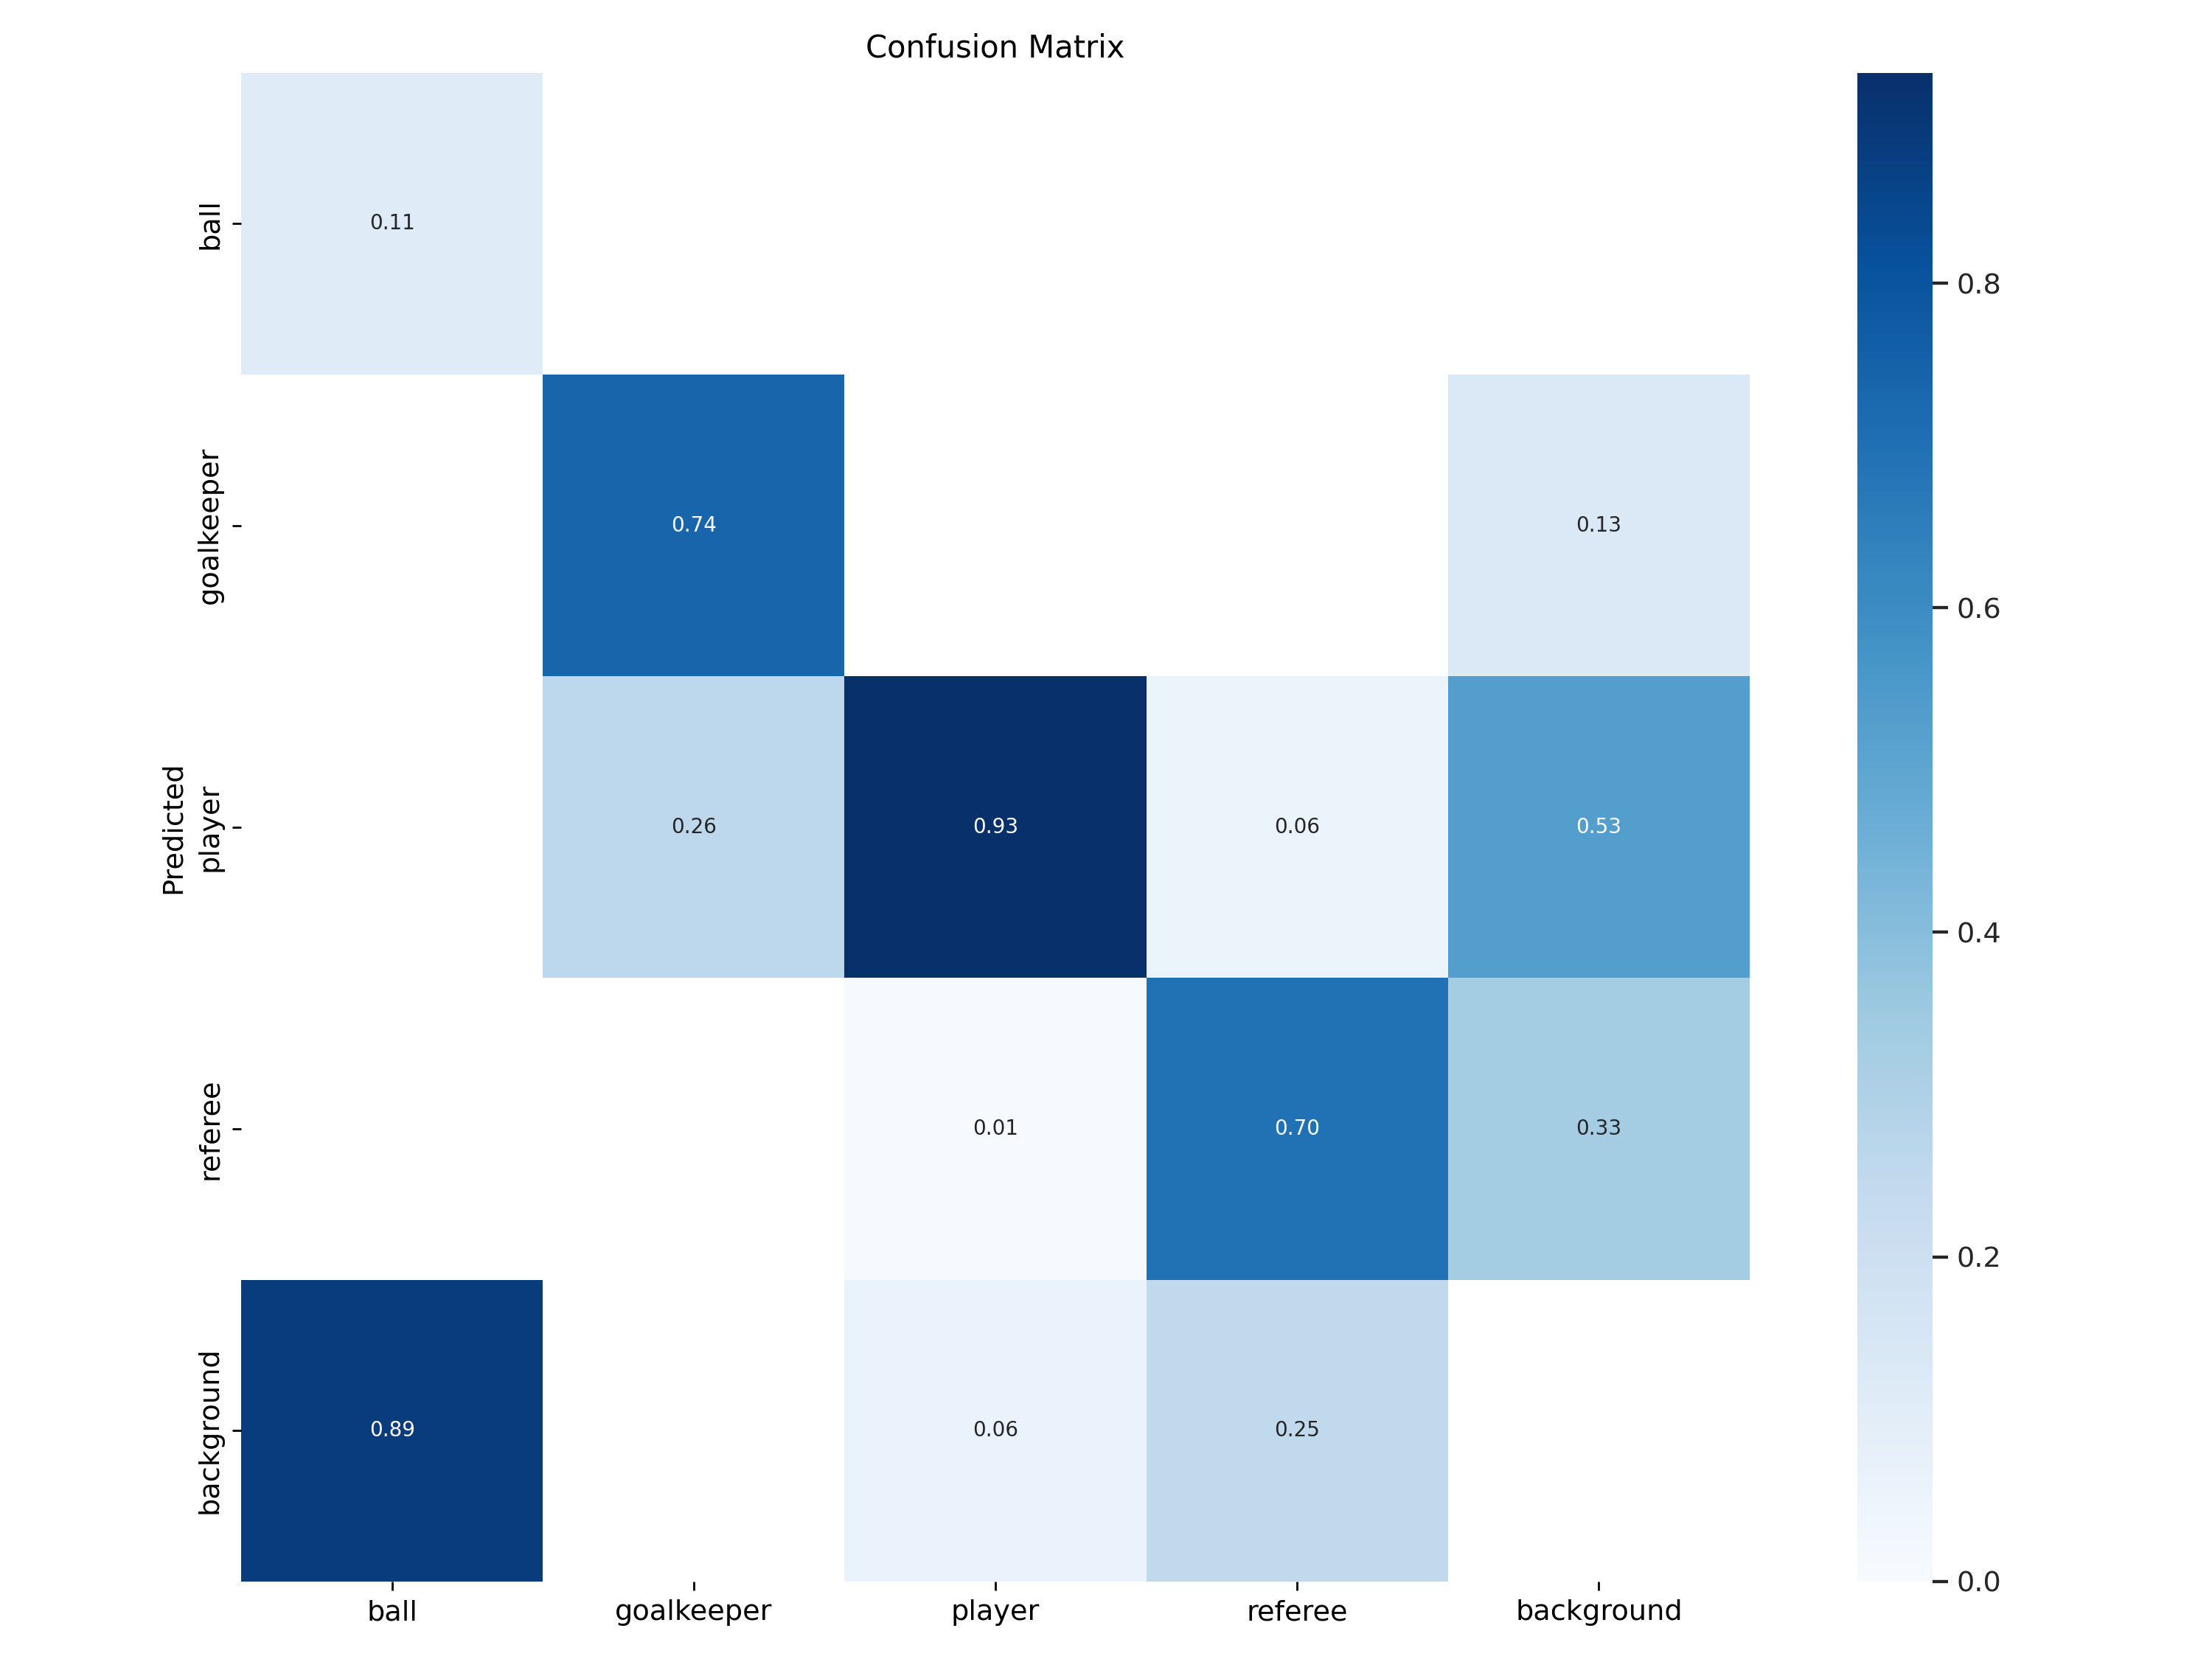

In [ ]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp/confusion_matrix.png", width=1000)

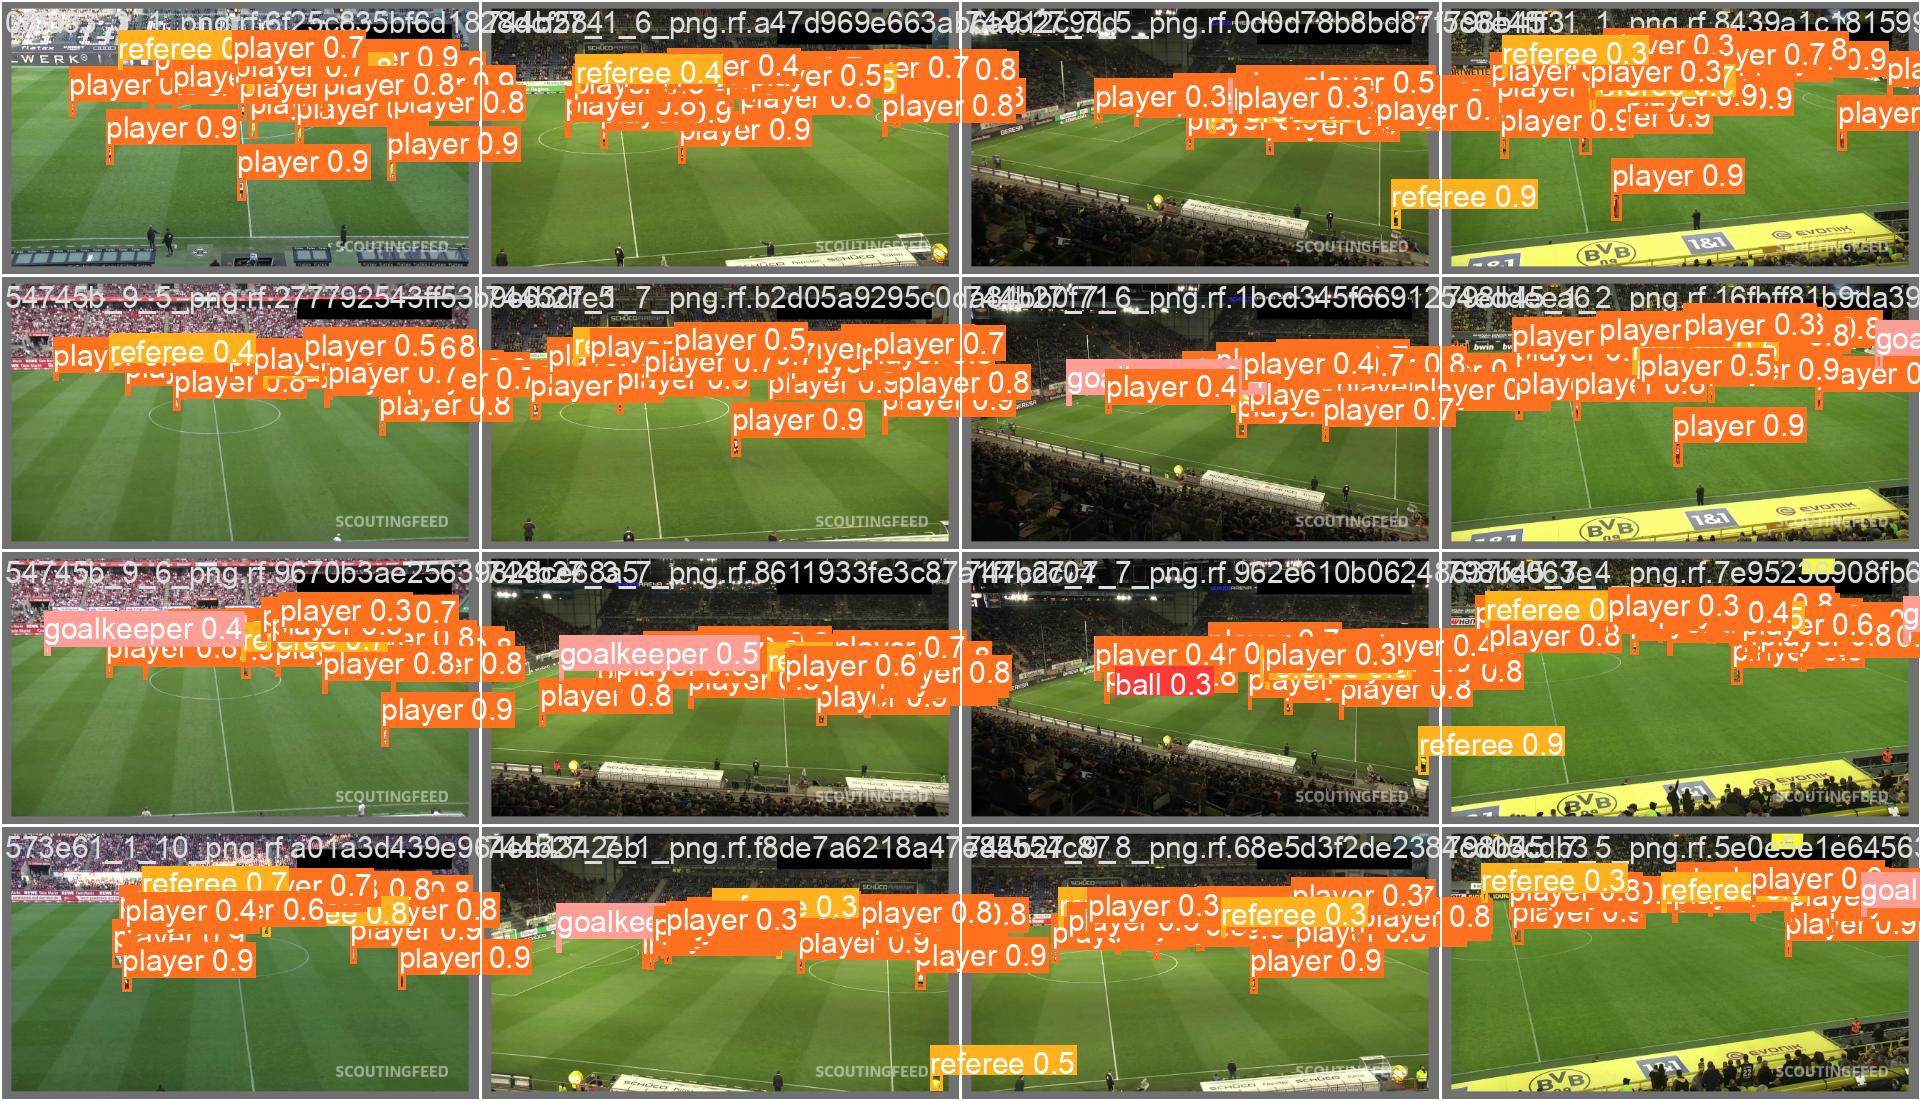

In [ ]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp/val_batch0_pred.jpg", width=1000)

## Validate Custom Model

In [8]:
%cd {HOME}/yolov9

!python val.py \
--img 1280 --batch 32 --conf 0.001 --iou 0.7 --device 0 \
--data {HOME}/yolov9/data/data.yaml \
--weights {HOME}/yolov9/runs/train/exp5/weights/best.pt

C:\Users\Admin\Desktop\yolov9\yolov9


val: data=C:\Users\Admin\Desktop\yolov9/yolov9/data/data.yaml, weights=['C:\\Users\\Admin\\Desktop\\yolov9/yolov9/runs/train/exp5/weights/best.pt'], batch_size=32, imgsz=1280, conf_thres=0.001, iou_thres=0.7, max_det=300, task=val, device=0, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs\val, name=exp, exist_ok=False, half=False, dnn=False, min_items=0
YOLOv5  1e33dbb Python-3.12.4 torch-2.6.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)

Fusing layers... 
gelan-c summary: 467 layers, 25411731 parameters, 0 gradients, 102.5 GFLOPs

val: Scanning C:\Users\Admin\Desktop\yolov9\yolov9\data\valid\labels...:   0%|          | 0/3 00:00
val: Scanning C:\Users\Admin\Desktop\yolov9\yolov9\data\valid\labels... 1 images, 0 backgrounds, 0 corrupt:  33%|███▎      | 1/3 00:20
val: Scanning C:\Users\Admin\Desktop\yolov9\yolov9\data\valid\labels... 3 images, 0 backgrounds, 0 corrupt: 100%|██████

## Inference with Custom Model

In [8]:
!python detect.py \
--img 640 --conf 0.1 --device 0 \
--weights {HOME}/yolov9/runs/train/exp5/weights/best.pt \
--source {HOME}/yolov9/data/test/images

detect: weights=['C:\\Users\\Admin\\Desktop\\yolov9/yolov9/runs/train/exp5/weights/best.pt'], source=C:\Users\Admin\Desktop\yolov9/yolov9/runs/result/TEST1/img/0218-1, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5  1e33dbb Python-3.12.4 torch-2.6.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)

Fusing layers... 
gelan-c summary: 467 layers, 25411731 parameters, 0 gradients, 102.5 GFLOPs
image 1/19 C:\Users\Admin\Desktop\yolov9\yolov9\runs\result\TEST1\img\0218-1\frame_0000.jpg: 384x640 7 -particle-s, 72.8ms
image 2/19 C:\Users\Admin\Desktop\yolov9\yolov9\runs\result\TEST1\img\0218-1\frame_0001.jpg: 384x640 8 -particle-s, 24

**NOTE:** Just like behore, the inference results have been saved in the appropriate directory inside `{HOME}/yolov9/runs/detect/`. Let's examine few of those results.

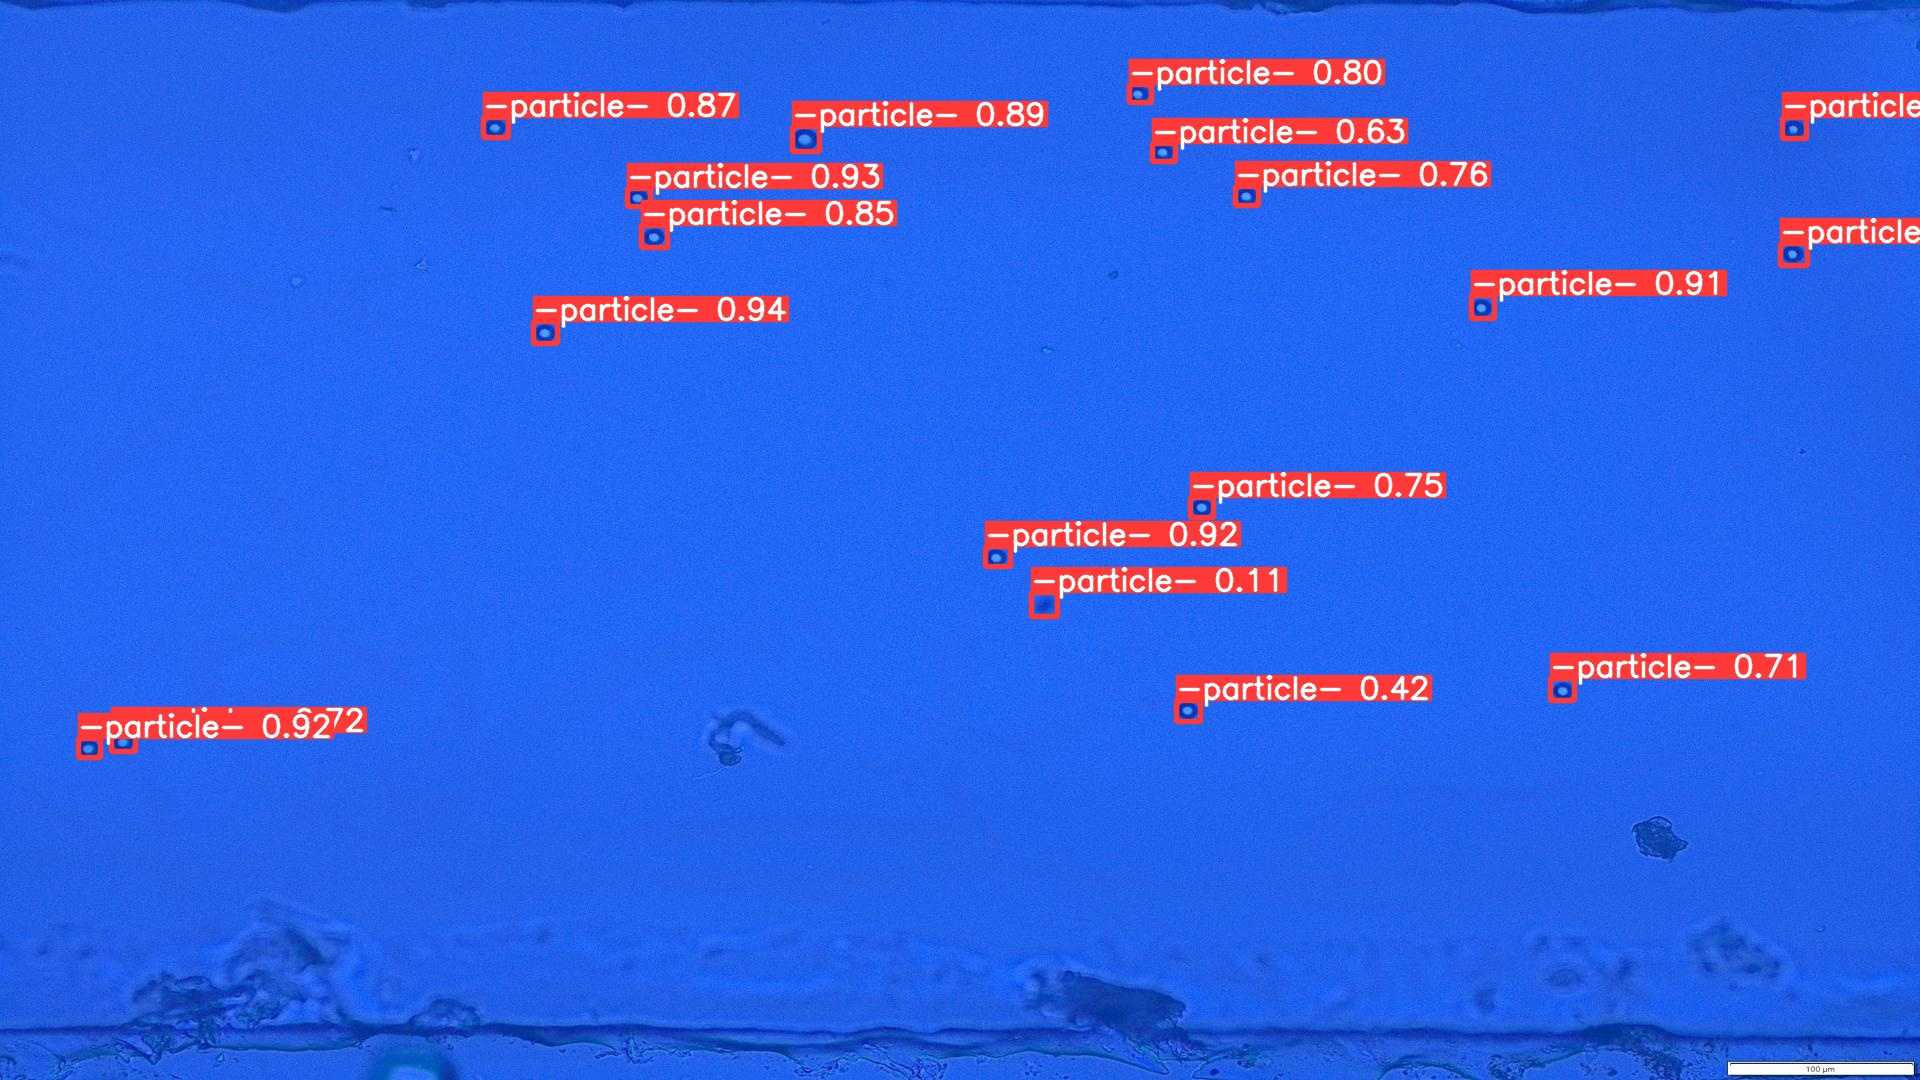

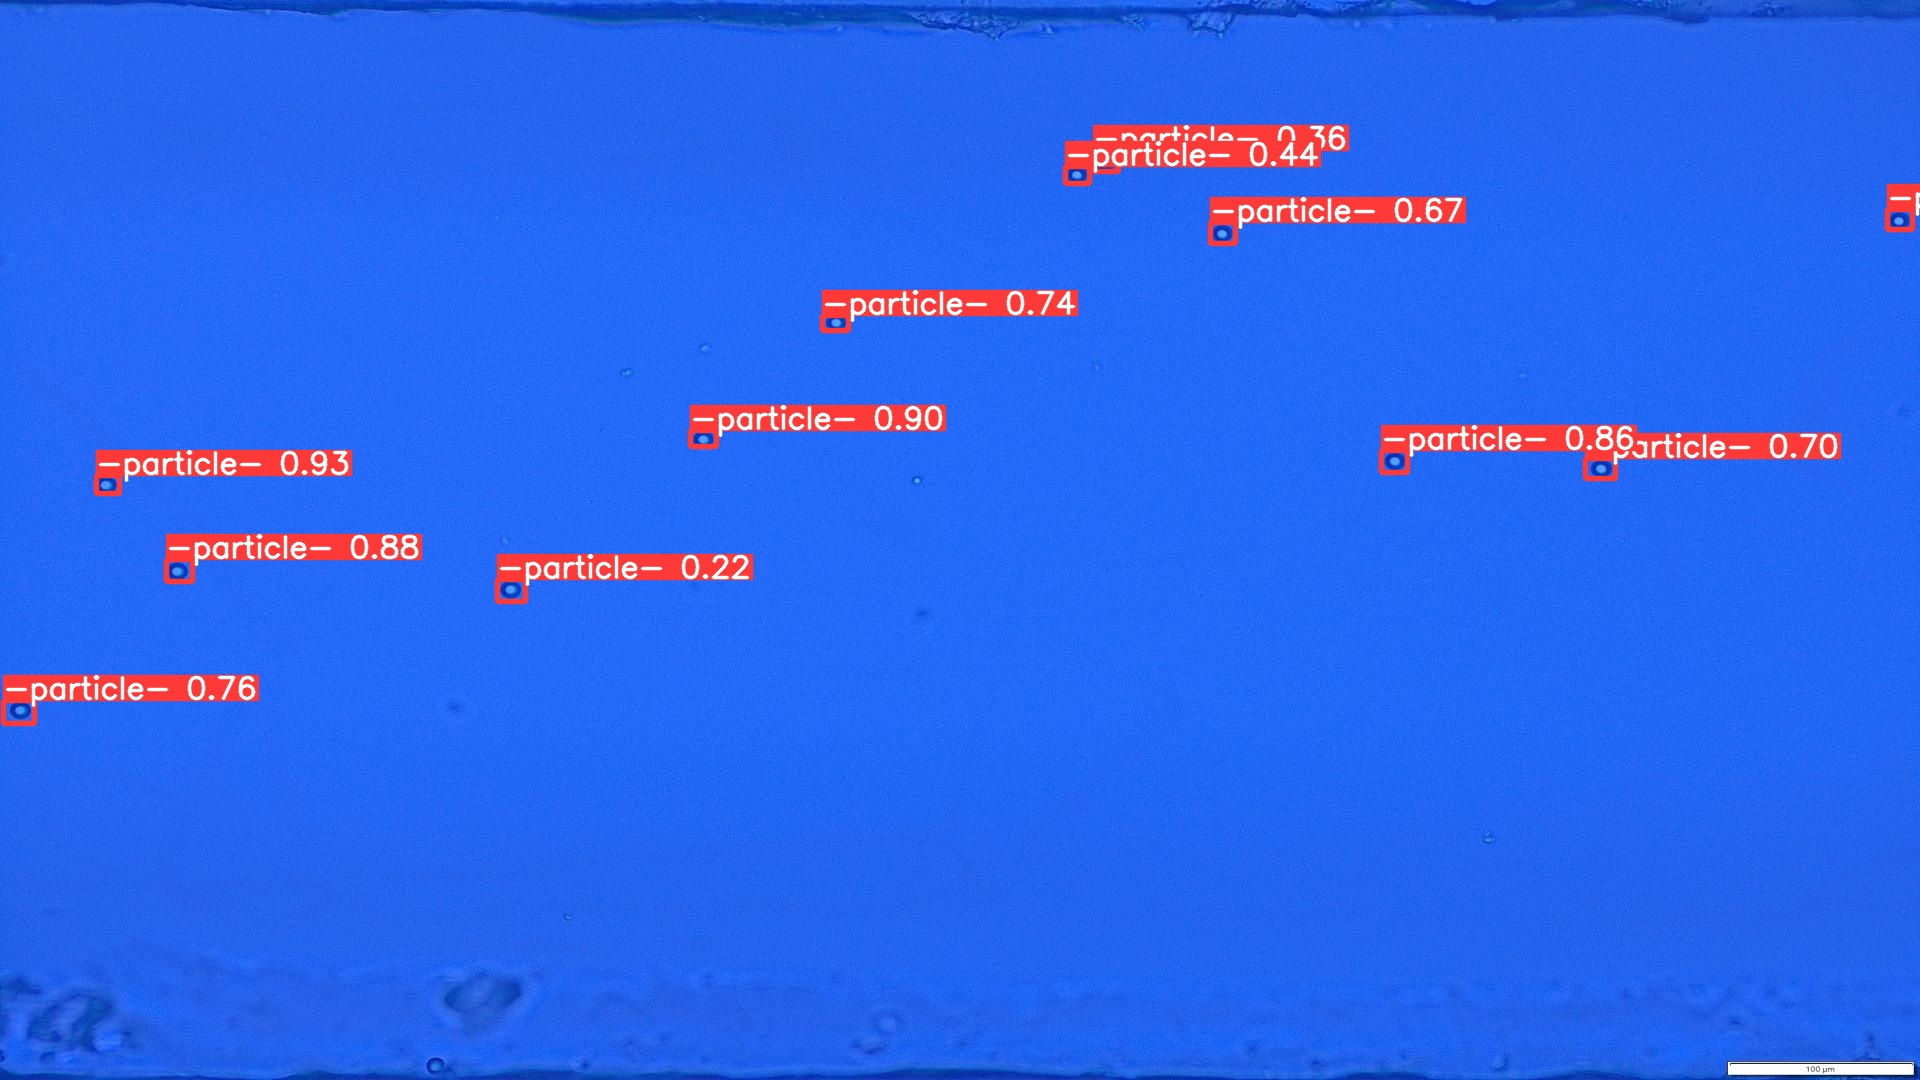

In [5]:
import glob

from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/yolov9/runs/detect/exp11/*.jpg')[:2]:
      display(Image(filename=image_path, width=600))

## BONUS: Deploy YOLOv9 Model with Inference

**NOTE:** To deploy the model and display inference results, we will need two additional packages - [`inference`](https://pypi.org/project/inference) and [`supervision`](https://pypi.org/project/supervision). Let's install and import them!

In [ ]:
!pip install -q inference supervision

In [ ]:
import cv2
import random
import getpass

import supervision as sv

from inference import get_model

%matplotlib inline

**NOTE:** Before using your model in Inference, you first need to upload your weights to Roboflow Universe. Ensure to specify the correct `model_type` - `yolov9`, and that the project version matches the version of the dataset you used for training, denoted by `[1]`. In my case, it's `6`.

![YOLOv9 Benchmark](https://storage.googleapis.com/com-roboflow-marketing/notebooks/examples/upload-roboflow-model.png)



In [ ]:
version.deploy(model_type="yolov9", model_path=f"{HOME}/yolov9/runs/train/exp")

View the status of your deployment at: https://app.roboflow.com/roboflow-jvuqo/football-players-detection-3zvbc/6
Share your model with the world at: https://universe.roboflow.com/roboflow-jvuqo/football-players-detection-3zvbc/model/6


**NOTE:** Now we can download our model anywhere using the assigned `model_id` denoted by `[2]`. In my case `football-players-detection-3zvbc/6`. To download the model you will need your [`ROBOFLOW_API_KEY`](https://docs.roboflow.com/api-reference/authentication).




In [ ]:
ROBOFLOW_API_KEY = getpass.getpass()

model = get_model(model_id="football-players-detection-3zvbc/8", api_key=ROBOFLOW_API_KEY)

··········


**NOTE:** Let's pick random image from our test subset and detect objects using newly fine-tuned model.

In [ ]:
image_paths = sv.list_files_with_extensions(
    directory=f"{dataset.location}/test/images",
    extensions=['png', 'jpg', 'jpeg']
)
image_path = random.choice(image_paths)
image = cv2.imread(image_path)

result = model.infer(image, confidence=0.1)[0]
detections = sv.Detections.from_inference(result)

**NOTE:** Finally, let's use supervision and [annotate](https://supervision.roboflow.com/develop/annotators/) our results.

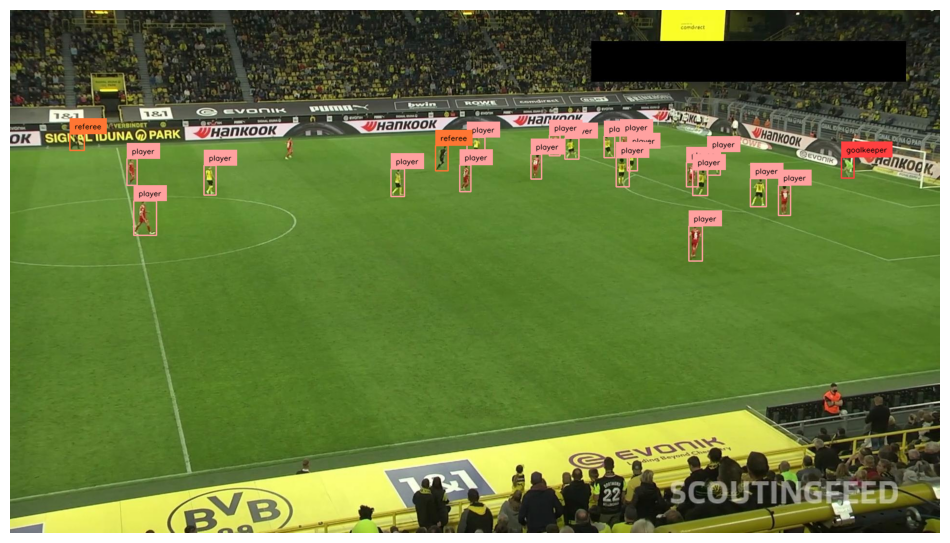

In [ ]:
label_annotator = sv.LabelAnnotator(text_color=sv.Color.BLACK)
bounding_box_annotator = sv.BoundingBoxAnnotator()

annotated_image = image.copy()
annotated_image = bounding_box_annotator.annotate(scene=annotated_image, detections=detections)
annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)

## import video

In [8]:
!git clone https://github.com/sujanshresstha/YOLOv9_DeepSORT.git


C:\Users\Admin\Desktop\yolov9\YOLOv9_DeepSORT


Cloning into 'YOLOv9_DeepSORT'...


In [12]:
%cd {HOME}\yolov9

C:\Users\Admin\Desktop\yolov9\yolov9


In [13]:
import cv2
import os
import torch
import numpy as np
import sys
sys.path.append("C:/Users/Admin/Desktop/yolov9/yolov9")  

from yolov9.models.experimental import attempt_load
from yolov9.utils.general import non_max_suppression, scale_coords
from yolov9.utils.torch_utils import select_device
from deep_sort_realtime.deepsort_tracker import DeepSort

In [9]:
pip install deep-sort-realtime

In [14]:
device = select_device('cuda:0' if torch.cuda.is_available() else 'cpu')

# 加载 YOLOv9 预训练模型
weights_path = "C:/Users/Admin/Desktop/yolov9/yolov9/runs/train/exp5/weights/best.pt"  
model = attempt_load(weights_path, device)
model.eval()

YOLOv5  1e33dbb Python-3.12.4 torch-2.6.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)

Fusing layers... 
gelan-c summary: 467 layers, 25411731 parameters, 0 gradients, 102.5 GFLOPs


DetectionModel(
  (model): Sequential(
    (0): Conv(
      (conv): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (act): SiLU(inplace=True)
    )
    (1): Conv(
      (conv): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (act): SiLU(inplace=True)
    )
    (2): RepNCSPELAN4(
      (cv1): Conv(
        (conv): Conv2d(128, 128, kernel_size=(1, 1), stride=(1, 1))
        (act): SiLU(inplace=True)
      )
      (cv2): Sequential(
        (0): RepNCSP(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): RepNBottleneck(
       

In [26]:
deepsort = DeepSort("deep_sort/deep/checkpoint/ckpt.t7", min_confidence=0.3, nms_max_overlap=0.5, use_cuda=True)


TypeError: DeepSort.__init__() got an unexpected keyword argument 'min_confidence'

In [24]:
!python "C:\Users\Admin\Desktop\yolov9\yolov9\YOLOv9_DeepSORT\object_tracking.py" --video ./data/test/videos/nccdtest1.avi --output ./runs/result/nccdtest1output.avi 

^C


I0215 17:35:24.180713 103336 embedder_pytorch.py:69] MobileNetV2 Embedder for Deep Sort initialised
I0215 17:35:24.180713 103336 embedder_pytorch.py:70] - gpu enabled: True
I0215 17:35:24.180713 103336 embedder_pytorch.py:71] - half precision: True
I0215 17:35:24.180713 103336 embedder_pytorch.py:72] - max batch size: 16
I0215 17:35:24.180713 103336 embedder_pytorch.py:73] - expects BGR: True
I0215 17:35:24.423622 103336 deepsort_tracker.py:142] DeepSort Tracker initialised
I0215 17:35:24.423622 103336 deepsort_tracker.py:143] - max age: 50
I0215 17:35:24.423622 103336 deepsort_tracker.py:144] - appearance threshold: 0.2
I0215 17:35:24.423622 103336 deepsort_tracker.py:145] - nms threshold: OFF
I0215 17:35:24.423622 103336 deepsort_tracker.py:148] - max num of appearance features: None
I0215 17:35:24.423622 103336 deepsort_tracker.py:149] - overriding track class : No
I0215 17:35:24.423622 103336 deepsort_tracker.py:152] - today given : No
I0215 17:35:24.423622 103336 deepsort_tracker.

In [25]:
video_path = "C:/Users/Admin/Desktop/yolov9/yolov9/data/test/videos/nccdtest1.avi"  
output_path = "C:/Users/Admin/Desktop/yolov9/yolov9/runs/result"  

# 读取视频
cap = cv2.VideoCapture(video_path)

# 获取视频参数
fps = int(cap.get(cv2.CAP_PROP_FPS))  # 视频帧率
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # 编码格式
out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))

frame_count = 0

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    frame_count += 1

    # **选择每秒提取几帧，例如每 5 帧处理一次**
    if frame_count % (fps // 5) == 0:  # 这里假设视频 FPS 为 30，每秒处理 5 帧
        img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  # 转换颜色空间
        img = cv2.resize(img, (640, 640))  # YOLOv9 需要特定尺寸
        img = img / 255.0  # 归一化
        img = torch.from_numpy(img).permute(2, 0, 1).unsqueeze(0).float().to(device)

        # **进行 YOLOv9 推理**
        with torch.no_grad():
            preds = model(img)[0]  # 获取模型预测结果
            preds = non_max_suppression(preds, conf_thres=0.5, iou_thres=0.5)  # NMS 处理

        detections = []
        for det in preds[0]:
            if len(det):
                for *xyxy, conf, cls in det:
                    x1, y1, x2, y2 = map(int, xyxy)
                    detections.append([x1, y1, x2 - x1, y2 - y1, conf.item()])

        # **进行目标跟踪**
        if detections:
            outputs = deepsort.update(np.array(detections), frame)

            # **绘制检测框和轨迹**
            for track in outputs:
                x1, y1, x2, y2, track_id = map(int, track[:5])
                cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
                cv2.putText(frame, f"ID {track_id}", (x1, y1 - 5),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

    out.write(frame)  # 保存帧到输出视频

cap.release()
out.release()
cv2.destroyAllWindows()


TypeError: iteration over a 0-d tensor

 ## 單幀辨識

In [4]:
pip install filterpy


     ---------------------------------------- 0.0/178.0 kB ? eta -:--:--
     ---- -------------------------------- 20.5/178.0 kB 330.3 kB/s eta 0:00:01
     -------------- ---------------------- 71.7/178.0 kB 787.7 kB/s eta 0:00:01
     -------------------------------------- 178.0/178.0 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for filterpy: filename=filterpy-1.4.5-py3-none-any.whl size=110542 sha256=93eb516bffdc5e0c1670a9e51e9350d878a0e1d11c9f32a01e2fb881cbe8849f
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\77\bf\4c\b0c3f4798a0166668752312a67118b27a3cd341e13ac0ae6ee
Successfully built filterpy
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [1]:
import os
HOME = os.getcwd()
print (HOME)

C:\Users\Admin\Desktop\yolov9


In [2]:
%cd {HOME}/yolov9

C:\Users\Admin\Desktop\yolov9\yolov9


In [5]:
import cv2
import os
import subprocess

# 設定影片檔案路徑和儲存結果的資料夾
video_path = r"C:\Users\Admin\Desktop\yolov9\yolov9\data\test\videos\nccdtest1.avi"
output_folder = r"C:\Users\Admin\Desktop\yolov9\yolov9\runs\result"
output_video = 'output_video.mp4'

# 創建儲存資料夾
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# 讀取影片
cap = cv2.VideoCapture(video_path)
fps = cap.get(cv2.CAP_PROP_FPS)  # 取得影片的 FPS
frame_count = 0

while True:
    ret, frame = cap.read()
    if not ret:
        break
    
    # 每秒鐘切割出幾幀（例如每秒 30 幀）
    if frame_count % int(fps) == 0:
        frame_name = os.path.join(output_folder, f'frame_{frame_count}.jpg')
        cv2.imwrite(frame_name, frame)
        # 呼叫 YOLO 辨識每一幀
        subprocess.run(['python', 'detect.py', '--source', frame_name])

    frame_count += 1

cap.release()

# 讀取處理後的幀，重新合成影片
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # 或者使用其他編碼格式
out = cv2.VideoWriter(output_video, fourcc, fps, (int(cap.get(3)), int(cap.get(4))))

for frame_file in sorted(os.listdir(output_folder)):
    frame = cv2.imread(os.path.join(output_folder, frame_file))
    out.write(frame)

out.release()
